### LAB 6

### Name: Samiksha Rajpal
### Student Id: 8908982

#### Logistic Regression

#### Problem Statement -
1. Using SciKit-Learn, train a binary logistic regression model on the Iris dataset. Use all four features and define only 2 labels: virginica and non-virginica. See the logistic regression notebook presented in class for a demonstration on how to set up these labels (3 points).

In [91]:
# importing the required libraries

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

##### Loading the iris dataset

In [78]:
#Loading data
iris = load_iris()
iris_table = pd.DataFrame(iris['data'], columns=iris['feature_names'])

#defining tareget and x components
x = iris_table.columns
y = iris.target
#displaying iris df
display(iris_table)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Adding Target Table

In [79]:
# adding target table
iris_table['target'] = iris.target



#### Checking correlation in the dataset

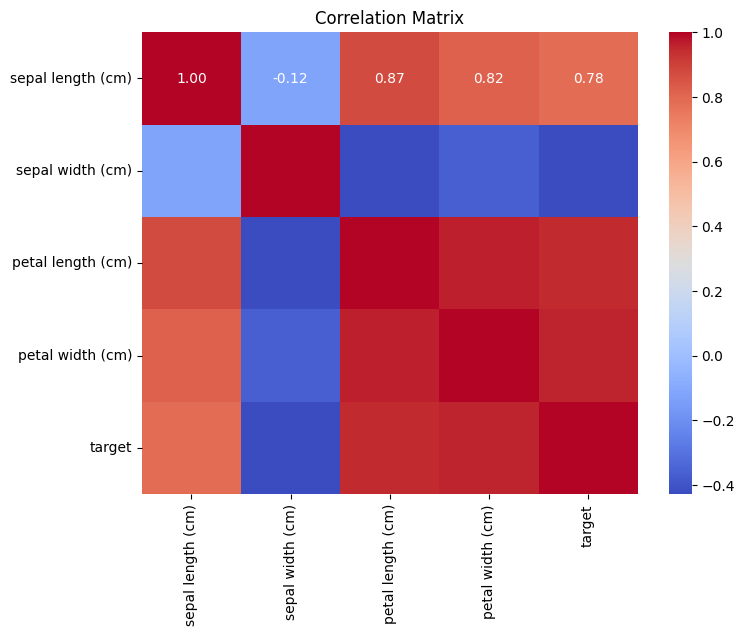

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   

                   petal width (cm)    target  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
target                     0.956547  1.000000  


In [80]:
# Calculate the correlation matrix
correlation_matrix = iris_table.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix)

In [81]:
#checking count of target
iris_table['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

#### Binary Labels

In [82]:
# Create binary labels for 'virginica' (label 2) and 'non-virginica' (labels 0)
iris_table['binary_labels'] = [2 if label == 2 else 0 for label in iris_table['target']]
display(iris_table)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,binary_labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


## Splitting the data for training and testing

In [83]:
# dropping target column
iris_table_del = iris_table.drop(['target', 'binary_labels'], axis=1)
display(iris_table)
display(iris_table_del)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,binary_labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### Scaling data

In [94]:
#using Min Max Scaling

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X_normalized = scaler.fit_transform(iris_table_del)


#### Splitting data into train and test

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, iris_table['binary_labels'], test_size=0.3, random_state=42)

#### Applying Regression Model

In [96]:

# 5. Train the logistic regression model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)




LogisticRegression()

#### Evaluating Model Performance

In [99]:
# Evaluating the model's performance
y_pred = logistic_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


#### Misclassified instances check and confusion matrix 

In [111]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix, considering labels '0' and '2'
confusion = confusion_matrix(y_test, y_pred, labels=[0, 2])


# Convert y_test and y_pred to NumPy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Find misclassified instances using NumPy's array indexing
misclassified_indices = np.where(y_test != y_pred)[0]


# Print the indices of misclassified instances
print("Misclassified instances indices:", misclassified_indices)

#Print confusion Matrix
print("Confusion Matrix:")
print(confusion)

Misclassified instances indices: []
Confusion Matrix:
[[32  0]
 [ 0 13]]


#### Plotting confusion Matrix

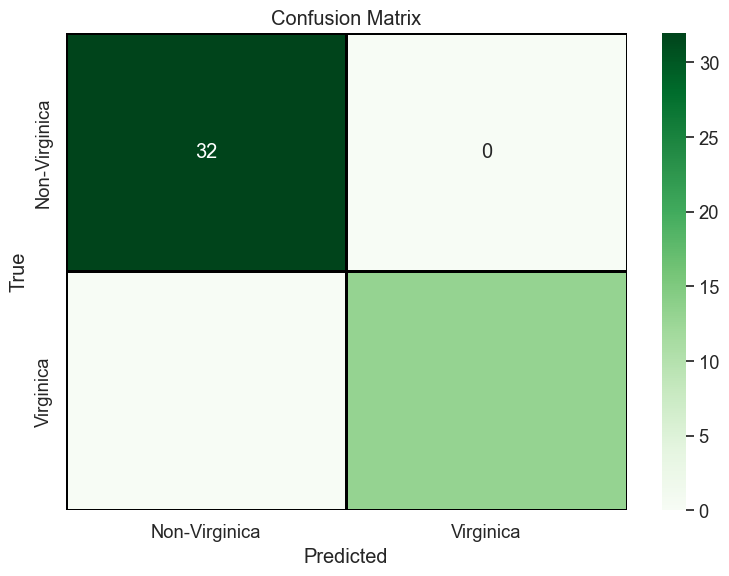

In [122]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  

sns.heatmap(confusion, annot=True, fmt="d", cmap="Greens", cbar=True, linewidths=1, linecolor="black")

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

class_labels = ['Non-Virginica', 'Virginica']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

plt.tight_layout()
plt.show()


Accuracy: This single value indicates the overall correctness of the model's classifications. A high accuracy suggests that the model is performing well in distinguishing between 'Virginica' and 'Non-Virginica' classes. 
An accuracy of 1 (or 100%) indicates that the model has made correct predictions for all instances in the dataset. In other words, the model has achieved perfect classification performance, and there are no misclassifications. This is the highest possible accuracy score and is often considered an ideal outcome.


Confusion Matrix: The confusion matrix breaks down the performance into different categories, offering a more nuanced view. It helps identify the types of errors the model is making.




#### Visualising Relationship between Virginica and Non Virginca based on petal length

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


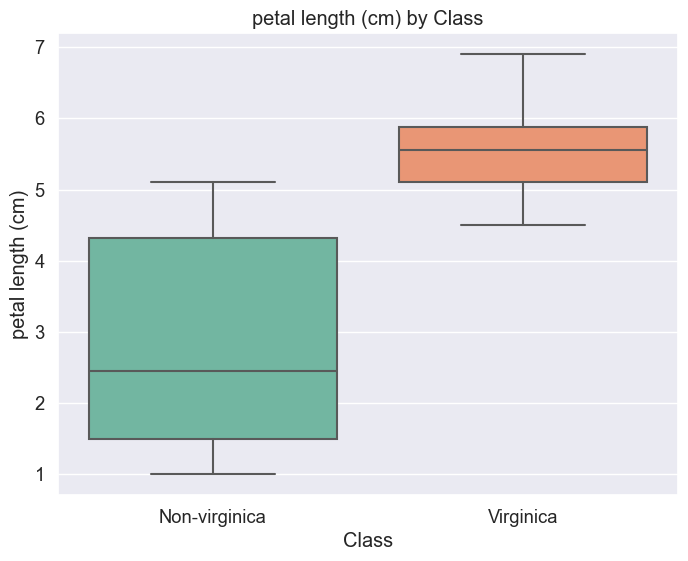

In [121]:


feature = 'petal length (cm)'

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='binary_labels', y=feature, data=iris_table, palette="Set2")
plt.xticks([0, 1], ['Non-virginica', 'Virginica'])
plt.xlabel('Class')
plt.ylabel(feature)
plt.title(f'{feature} by Class')
plt.show()
